In [4]:
# import libraries
import librosa as li
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# create file path
file_path = "../raw_data/03-01-01-01-01-01-01.wav"

In [14]:
# load the audio into librosa
# y is a NumPy array witht he waveform data
# sr is the sample rate (16khz)

y, sr = li.load(file_path, sr=16000)

In [15]:
# scales the waveform so the maximum value is 1.
y = y / np.abs(y).max()

In [16]:
# remove silence
y, _ = li.effects.trim(y)

In [17]:
# compute the mel spectogram
# it's a 2d array (rows = frequency ; columns = time ; values = intensity (brightness))
S = li.feature.melspectrogram(y=y, sr=sr)

In [18]:
# convert the spectogram into decibel scale (log scale)
S_dB = li.power_to_db(S, ref=np.max)

In [19]:
# reshape the spectogram so it can be inputed to the CNN
# this is the matrix that represents an image and that will be inputed to the CNN
input = S_dB
input = np.expand_dims(S_dB, axis=(0, 1))
# shape: (batch_size, channels, height, width)
# height = rows = frequency
# width = columns = time
# channels = 1 color channel = greyscale

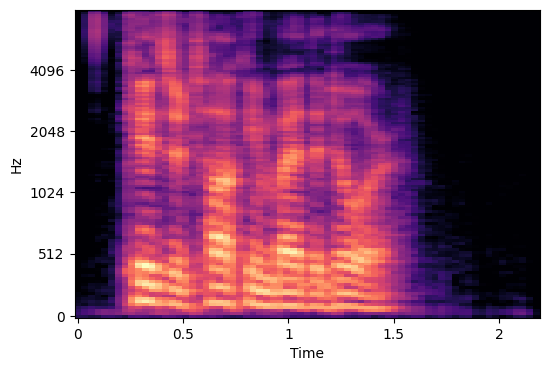

In [21]:
# display spectogram
plt.figure(figsize=(6, 4))
li.display.specshow(S_dB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')